In [1]:
import mne
import requests

In [2]:
from sklearn.decomposition import PCA, FastICA

https://mne.tools/dev/generated/mne.datasets.eegbci.load_data.html

In [ ]:
mne.datasets.eegbci.load_data(31)

# Explore data

In [ ]:
# Useful tasks
tasks = [5, 6, 9, 10, 13, 14]

In [4]:
edf_raw.del_proj()

<RawEDF | S001R04.edf, 64 x 20000 (125.0 s), ~64 kB, data not loaded>

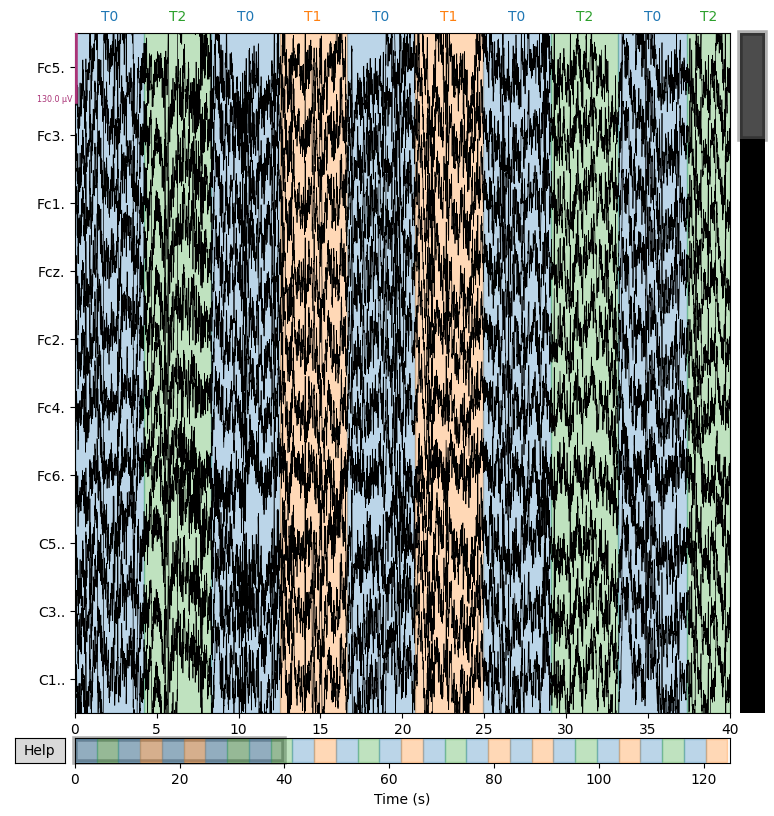

In [11]:
_ = edf_raw.plot(n_channels=10, scalings='auto', duration=40, remove_dc=False)

Effective window size : 12.800 (s)


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s finished
/var/folders/zz/zyxvpxvq6csfxvn_n0005kg0001clr/T/ipykernel_28383/1358273341.py:1: RuntimeWarning: Channel locations not available. Disabling spatial colors.
  _ = edf_raw.plot_psd()


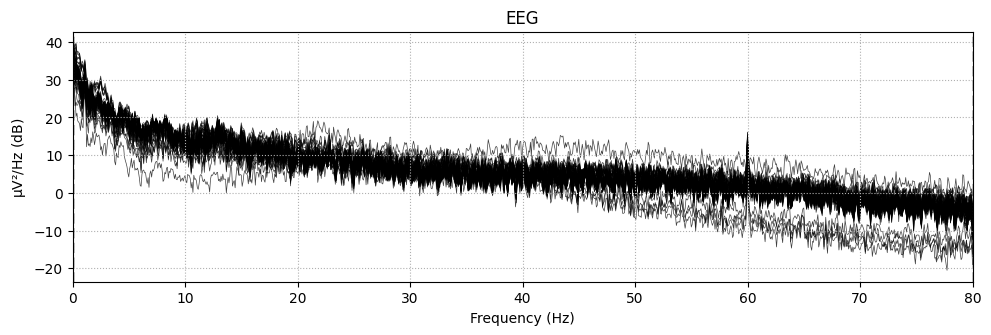

In [12]:
_ = edf_raw.plot_psd()

In [10]:
eeg_channels = mne.pick_types(edf_raw.info, eeg=True)

In [11]:
eeg_channels

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
       51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63])

In [14]:
edf_raw.load_data()

Reading 0 ... 9759  =      0.000 ...    60.994 secs...


<RawEDF | S001R01.edf, 64 x 9760 (61.0 s), ~4.8 MB, data loaded>

In [12]:
(events_from_annot,
 event_dict) = mne.events_from_annotations(edf_raw)

Used Annotations descriptions: ['T0', 'T1', 'T2']


In [18]:
event_dict

{'T0': 1, 'T1': 2, 'T2': 3}

In [21]:
mne.find_events(edf_raw, 'T1')

ValueError: No stim channel found to extract event triggers.

In [31]:
edf_raw.copy().pick_types(eeg=True, stim=True)

<RawEDF | S001R01.edf, 64 x 9760 (61.0 s), ~4.8 MB, data loaded>

In [15]:
edf_raw.annotations

<Annotations | 30 segments: T0 (15), T1 (8), T2 (7)>

In [16]:
events_from_annot

array([[    0,     0,     1],
       [  672,     0,     3],
       [ 1328,     0,     1],
       [ 2000,     0,     2],
       [ 2656,     0,     1],
       [ 3328,     0,     2],
       [ 3984,     0,     1],
       [ 4656,     0,     3],
       [ 5312,     0,     1],
       [ 5984,     0,     3],
       [ 6640,     0,     1],
       [ 7312,     0,     2],
       [ 7968,     0,     1],
       [ 8640,     0,     3],
       [ 9296,     0,     1],
       [ 9968,     0,     2],
       [10624,     0,     1],
       [11296,     0,     3],
       [11952,     0,     1],
       [12624,     0,     2],
       [13280,     0,     1],
       [13952,     0,     2],
       [14608,     0,     1],
       [15280,     0,     3],
       [15936,     0,     1],
       [16608,     0,     2],
       [17264,     0,     1],
       [17936,     0,     3],
       [18592,     0,     1],
       [19264,     0,     2]])

### Filtering

Guide: https://mne.tools/stable/auto_tutorials/preprocessing/25_background_filtering.html

### Parsing

In [ ]:
https://www.youtube.com/watch?v=B9ti7boa9jc